#  UN Data Analysis Project

Analysis on UN Data comparing gdp per capita and internet usage.

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Formatting

In [2]:
%matplotlib inline

### Load Data

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv', nrows=6729)

In [4]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)

### Answering Questions

##### 7. Look at the shape of each dataframe - how many rows, how many columns.

In [5]:
gdp_df.shape

# 6729 rows, 4 columns

(6729, 4)

In [6]:
internet_df.shape

# 4495 rows, 4 columns

(4495, 4)

##### 8. Take a look at the data types for the columns in each table.

In [7]:
type(gdp_df)

pandas.core.frame.DataFrame

In [8]:
type(internet_df)

pandas.core.frame.DataFrame

##### 9. Take a look at the last 10 rows of each dataset in turn.

In [9]:
print(gdp_df.tail(10))

     Country or Area  Year        Value  Value Footnotes
6719        Zimbabwe  1999  3054.064189              NaN
6720        Zimbabwe  1998  3099.076182              NaN
6721        Zimbabwe  1997  3036.422224              NaN
6722        Zimbabwe  1996  2985.856605              NaN
6723        Zimbabwe  1995  2736.486436              NaN
6724        Zimbabwe  1994  2768.309953              NaN
6725        Zimbabwe  1993  2572.870395              NaN
6726        Zimbabwe  1992  2591.007534              NaN
6727        Zimbabwe  1991  2906.272849              NaN
6728        Zimbabwe  1990  2819.549467              NaN


In [10]:
print(internet_df.tail(10))

     Country or Area  Year     Value  Value Footnotes
4485        Zimbabwe  2002  3.994356              NaN
4486        Zimbabwe  2001  0.799846              NaN
4487        Zimbabwe  2000  0.401434              NaN
4488        Zimbabwe  1999  0.161676              NaN
4489        Zimbabwe  1998  0.081648              NaN
4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN


##### 10. Drop the 'value footnotes' data (column) from both datasets. Check that this worked as expected.

In [11]:
del gdp_df['Value Footnotes']

In [12]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [13]:
del internet_df['Value Footnotes']

In [14]:
internet_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

##### 11. Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [15]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [16]:
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

##### 12. Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [17]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [18]:
internet_df.columns

Index(['Country', 'Year', 'Internet_Users_Pct'], dtype='object')

##### 13. Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [19]:
print(gdp_df.dtypes)
print(internet_df.dtypes)

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object
Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object


In [20]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df,
                               on = ['Country', 'Year'], how = 'outer')

##### 14. Look at the first five rows of your new data frame to confirm it merged correctly.

In [21]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


##### 15. Look at the last five rows to make sure the data is clean and as expected.

In [22]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645
7704,Virgin Islands (U.S.),1990,NaN,0.000000


In [23]:
gdp_and_internet_use.shape

(7705, 4)

##### 16. Subset the combined data frame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [24]:
gdp_and_internet_use_subset = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004,2009,2014])]

In [25]:
print(gdp_and_internet_use_subset)

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
4               Afghanistan  2014     1795.735834            6.390000
9               Afghanistan  2009     1502.354073            3.550000
14              Afghanistan  2004     1025.208245            0.105809
21                  Albania  2014    10700.993216           60.100000
26                  Albania  2009     9525.377979           41.200000
...                     ...   ...             ...                 ...
7668               Viet Nam  2009             NaN           26.550000
7673               Viet Nam  2004             NaN            7.642409
7683  Virgin Islands (U.S.)  2014             NaN           50.070000
7688  Virgin Islands (U.S.)  2009             NaN           27.396510
7693  Virgin Islands (U.S.)  2004             NaN           27.377009

[835 rows x 4 columns]


In [26]:
gdp_and_internet_use_subset.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.390000
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2004,1025.208245,0.105809
21,Albania,2014,10700.993216,60.100000
26,Albania,2009,9525.377979,41.200000


In [27]:
gdp_and_internet_use_subset = gdp_and_internet_use_subset.reset_index(drop = True)
gdp_and_internet_use_subset.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.390000
1,Afghanistan,2009,1502.354073,3.550000
2,Afghanistan,2004,1025.208245,0.105809
3,Albania,2014,10700.993216,60.100000
4,Albania,2009,9525.377979,41.200000


##### 17. Create three new data frames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [28]:
gdpandint_2004 = gdp_and_internet_use_subset[gdp_and_internet_use_subset["Year"].isin([2004])]
gdpandint_2009 = gdp_and_internet_use_subset[gdp_and_internet_use_subset["Year"].isin([2009])]
gdpandint_2014 = gdp_and_internet_use_subset[gdp_and_internet_use_subset["Year"].isin([2014])]

In [32]:
# just checking it worked
print(gdpandint_2004.head())
print(gdpandint_2009.head())
print(gdpandint_2014.head())

                Country  Year  GDP_Per_Capita  Internet_Users_Pct
2           Afghanistan  2004     1025.208245            0.105809
5               Albania  2004     7001.054082            2.420388
8               Algeria  2004    11845.170512            4.634475
11               Angola  2004     4604.657044            0.464815
14  Antigua and Barbuda  2004    21161.123532           24.266544
                Country  Year  GDP_Per_Capita  Internet_Users_Pct
1           Afghanistan  2009     1502.354073                3.55
4               Albania  2009     9525.377979               41.20
7               Algeria  2009    12697.690780               11.23
10               Angola  2009     6292.534856                6.00
13  Antigua and Barbuda  2009    22568.626530               42.00
                Country  Year  GDP_Per_Capita  Internet_Users_Pct
0           Afghanistan  2014     1795.735834                6.39
3               Albania  2014    10700.993216               60.10
6         

##### 18. Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab for auto-complete options).

In [36]:
print(gdpandint_2014[gdpandint_2014.Internet_Users_Pct == gdpandint_2014.Internet_Users_Pct.max()])

# Iceland, 98.16 percent

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
271  Iceland  2014    42774.888849               98.16


##### 19. Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [37]:
print(gdpandint_2014[gdpandint_2014.Internet_Users_Pct == gdpandint_2014.Internet_Users_Pct.min()])

# North Korea, 0.0 percent

                         Country  Year  GDP_Per_Capita  Internet_Users_Pct
744  Dem. People's Rep. of Korea  2014             NaN                 0.0


##### 20. Repeat for 2004 and 2009.

In [38]:
print(gdpandint_2004[gdpandint_2004.Internet_Users_Pct == gdpandint_2004.Internet_Users_Pct.max()])
print(gdpandint_2004[gdpandint_2004.Internet_Users_Pct == gdpandint_2004.Internet_Users_Pct.min()])

# 2004 
# Max - Sweden, 83.89 percent
# Min - Same as 2014, North Korea, 0.0 percent

    Country  Year  GDP_Per_Capita  Internet_Users_Pct
627  Sweden  2004    40177.850408               83.89
                         Country  Year  GDP_Per_Capita  Internet_Users_Pct
746  Dem. People's Rep. of Korea  2004             NaN                 0.0


In [39]:
print(gdpandint_2009[gdpandint_2009.Internet_Users_Pct == gdpandint_2009.Internet_Users_Pct.max()])
print(gdpandint_2009[gdpandint_2009.Internet_Users_Pct == gdpandint_2009.Internet_Users_Pct.min()])

# 2009
# Max - Iceland, 93 percent
# Min - Same as above, North Korea, 0.0 percent

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
272  Iceland  2009    41505.084834                93.0
                         Country  Year  GDP_Per_Capita  Internet_Users_Pct
745  Dem. People's Rep. of Korea  2009             NaN                 0.0


##### 21. Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [40]:
print(gdpandint_2014[gdpandint_2014.GDP_Per_Capita == gdpandint_2014.GDP_Per_Capita.max()])

# China, 130,439.106674

              Country  Year  GDP_Per_Capita  Internet_Users_Pct
385  Macao SAR, China  2014   130439.106674                 NaN


##### 22. Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [41]:
print(gdpandint_2014[gdpandint_2014.GDP_Per_Capita == gdpandint_2014.GDP_Per_Capita.min()])

# Central African Republic, 672.681648

                      Country  Year  GDP_Per_Capita  Internet_Users_Pct
107  Central African Republic  2014      672.681648                 NaN


##### 23. Create some scatterplots:
    a. 2004 Percent Using the Internet vs GDP Per Capita 
    b. 2009 Percent Using the Internet vs GDP Per Capita
    c. 2014 Percent Using the Internet vs GDP Per Capita

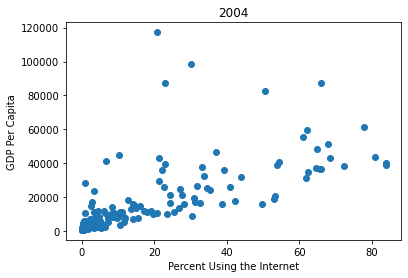

In [45]:
plt.xlabel('Percent Using the Internet')
plt.ylabel('GDP Per Capita')
plt.title(2004)

plt.scatter(gdpandint_2004.Internet_Users_Pct, gdpandint_2004.GDP_Per_Capita)

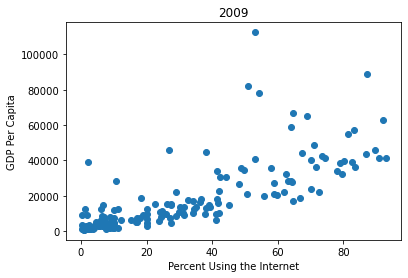

In [46]:
plt.xlabel('Percent Using the Internet')
plt.ylabel('GDP Per Capita')
plt.title(2009)

plt.scatter(gdpandint_2009.Internet_Users_Pct, gdpandint_2009.GDP_Per_Capita)

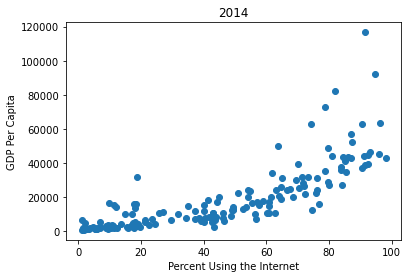

In [47]:
plt.xlabel('Percent Using the Internet')
plt.ylabel('GDP Per Capita')
plt.title(2014)

plt.scatter(gdpandint_2014.Internet_Users_Pct, gdpandint_2014.GDP_Per_Capita)

##### 24. Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

    1. The percentage of internet use dramatically increased between 2004 & 2014 across the globe. No surprise there.
    2. It seams that there used less of a huge descrepancy in gdp around the world. Still some, but in 2014 it's huge. Not as evenly distributed.
    3. Between the 2, it seems that the more internet users, the higher the GDP.

##### 25. Look at the distribution of gdp per capita values for 2014. Is it unimodal?

    If I'm understanding this correctly, yes it is unimodal.

##### 26. Look at the distribution of Internet Use for 2014. Is it unimodal?

    Again, if I'm understanding correctly, yes.

##### 27. What are the top 5 countries in terms of internet use in 2014?

In [48]:
print(gdpandint_2014.nlargest(5, 'Internet_Users_Pct'))

# Iceland, Bermuda, Norway, Denmark, Andorra.

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
271  Iceland  2014    42774.888849               98.16
725  Bermuda  2014             NaN               96.80
480   Norway  2014    63328.259526               96.30
149  Denmark  2014    45057.083449               95.99
719  Andorra  2014             NaN               95.90


##### 28. Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. Check that this is true.

In [49]:
top_5_internet = gdp_and_internet_use_subset[gdp_and_internet_use_subset["Country"].isin(['Iceland','Bermuda','Norway', 'Denmark', 'Andorra'])]

In [53]:
top_5_internet.shape

(15, 4)

In [54]:
top_5_internet = top_5_internet.reset_index(drop = True)
top_5_internet.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Bermuda,2009,57151.919132,83.250000
1,Bermuda,2004,55452.638880,60.990867
2,Denmark,2014,45057.083449,95.990000
3,Denmark,2009,43382.615688,86.840000
4,Denmark,2004,43670.446201,80.930000


##### 29. Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?

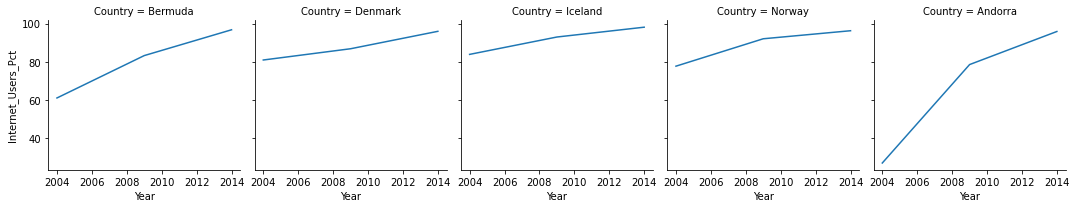

In [70]:
g = sns.FacetGrid(top_5_internet.sort_values('Year'),
             col='Country')
g.map(plt.plot, 'Year', 'Internet_Users_Pct')

# Andorra had the greatest increase during these years.

In [64]:
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Bermuda,2009,57151.919132,83.250000
1,Bermuda,2004,55452.638880,60.990867
2,Denmark,2014,45057.083449,95.990000
3,Denmark,2009,43382.615688,86.840000
4,Denmark,2004,43670.446201,80.930000
5,Iceland,2014,42774.888849,98.160000
6,Iceland,2009,41505.084834,93.000000
7,Iceland,2004,38893.378798,83.880000
8,Norway,2014,63328.259526,96.300000
9,Norway,2009,62617.153609,92.080000
